# Little Matplotlib Cookbook

In [1]:
import sys
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## First Examples

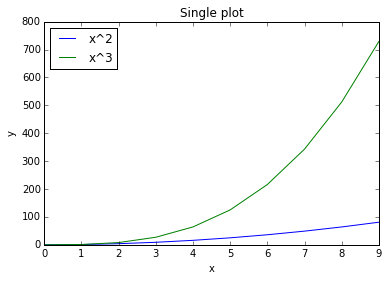

In [26]:
# data
x = np.array(range(10))
y = np.square(x)
z = np.power(x, 3)

# plot
fig, ax = plt.subplots()
ax.set(title = "Single plot", xlabel = "x", ylabel = "y")
_tmp_0 = ax.plot(x, y, label = 'x^2')
_tmp_1 = ax.plot(x, z, label = 'x^3')
_l = ax.legend(loc = 'upper left')

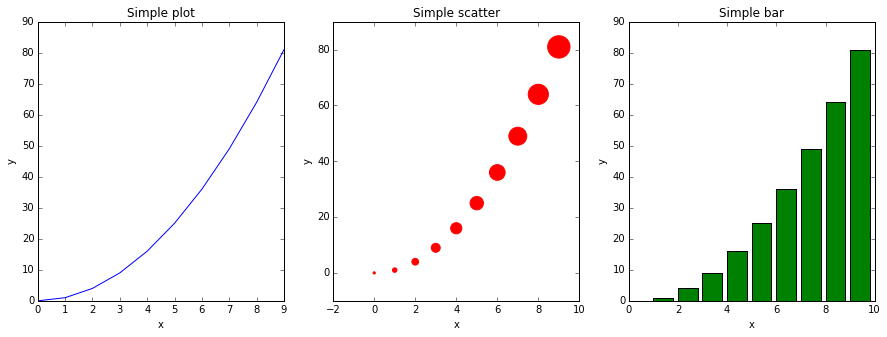

In [25]:
# data
x = np.array(range(10))
y = np.square(x)
weight = 5 * np.square(1 + x)

# plotting
fig, ax = plt.subplots(1,3, figsize = (15, 5))
ax[0].set(title = "Simple plot", xlabel = "x", ylabel = "y")
_tmp_0 = ax[0].plot(x, y, label = 'x^2', color = "blue")
ax[1].set(title = "Simple scatter", xlabel = "x", ylabel = "y")
_tmp_1 = ax[1].scatter(x, y, marker = 'o', s = weight, color = 'red')
ax[2].set(title = "Simple bar", xlabel = "x", ylabel = "y")
_tmp_2 = ax[2].bar(x, y, color = "green")


## Scatter

** Remember **
* _x, y_ are array-like (e.g., lists of floats or 1D numpy arrays),
* _c / color_, _s / size_, _linewidths_, _edgecolors_ are either single value or array-like,
* _marker_ is single value.

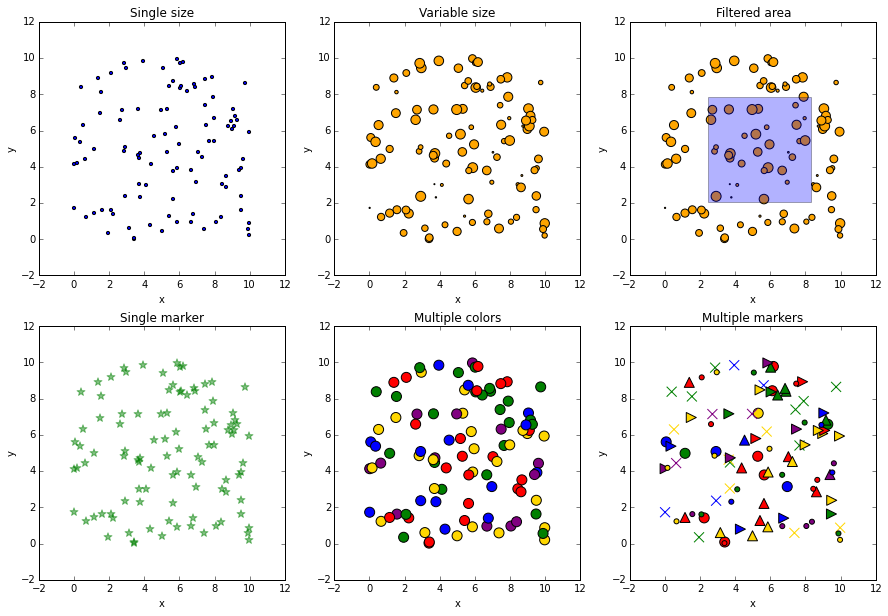

In [55]:
# data
N = 100
data = 10 * np.random.rand(2, N)
size = 100 * np.random.rand(1, N)
COLORS = ['purple', 'red', 'blue', 'green', 'gold']
color_idx_list = np.random.choice(range(len(COLORS)), N)
MARKERS = ['o', 'x', '^', '>', '.']
marker_list = [MARKERS[m] for m in np.random.choice(range(len(MARKERS)), N)]

x_left = np.mean(data[0]) - np.std(data[0]); x_right = np.mean(data[0]) + np.std(data[0])
x_range = [x_left, x_right]
y_bottom = np.mean(data[1]) - np.std(data[1]); y_upper = np.mean(data[1]) + np.std(data[1])

# plotting
fig, ax = plt.subplots(3,3, figsize = (15, 10))

ax[0,0].set(title = "Single size", xlabel = "x", ylabel = "y")
_tmp_0 = ax[0,0].scatter(data[0], data[1], c = "blue", s = 10)
ax[0,1].set(title = "Variable size", xlabel = "x", ylabel = "y")
_tmp_1 = ax[0,1].scatter(data[0], data[1], c = "orange", s = size)
ax[0,2].set(title = "Filtered area", xlabel = "x", ylabel = "y")
_tmp_2 = ax[0,2].scatter(data[0], data[1], c = "orange", s = size)
_tmp_2 = ax[0,2].fill_between(x_range, y_bottom, y_upper, alpha = 0.3)

ax[1,0].set(title = "Single marker", xlabel = "x", ylabel = "y")
_tmp_3 = ax[1,0].scatter(data[0], data[1], color = "green", s = 70, marker = "*", alpha = 0.5)

ax[1,1].set(title = "Multiple colors", xlabel = "x", ylabel = "y")
colors = [COLORS[c] for c in color_idx_list]
_tmp_4 = ax[1,1].scatter(data[0], data[1], c = colors, s = 100, marker = "o")

ax[1,2].set(title = "Multiple markers", xlabel = "x", ylabel = "y")
for i, marker in enumerate(MARKERS):
    # extract data points that correspond to single color and marker 
    IDX = [i for i,m in enumerate(marker_list) if m == marker]
    x = data[0][IDX]; y = data[1][IDX]; c = [COLORS[c] for c in color_idx_list[IDX]]
    _tmp_5 = ax[1,2].scatter(x, y, c = c, s = 100, marker = marker)

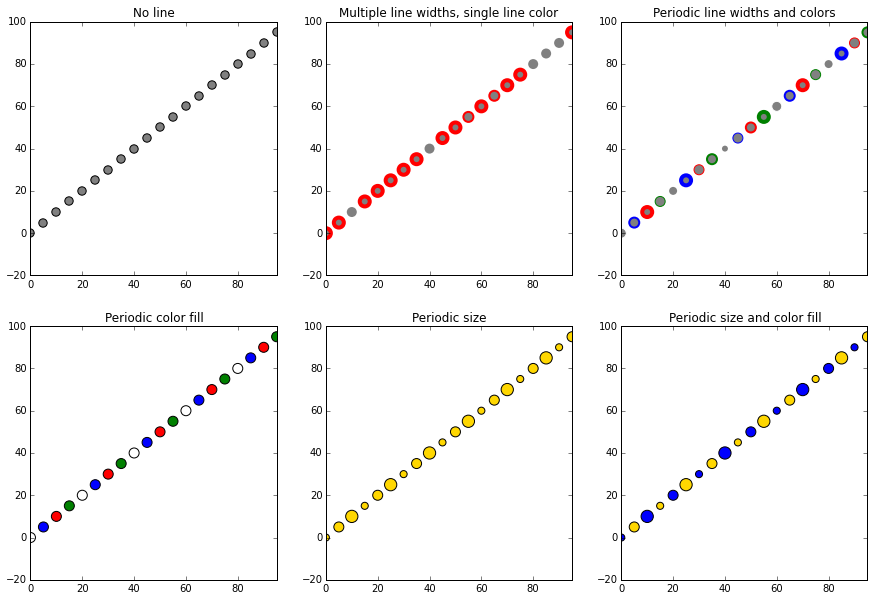

In [107]:
# data
N = 100; step = 5
x = list(range(0, N, step))
y = x
widths = np.random.choice([0, 2, 4], len(x))
size = 100 * np.random.rand(1, len(x))

# plotting
fig, ax = plt.subplots(2, 3, figsize = (15, 10))
ax[0,0].set(title = 'No line', xlim = (min(x), max(x)))
_tmp_0 = ax[0,0].scatter(x, y, s = 70, c = 'grey')
ax[0,1].set(title = 'Multiple line widths, single line color', xlim = (min(x), max(x)))
_tmp_1 = ax[0,1].scatter(x, y, s = 100, c = 'grey', linewidths = widths, edgecolors = 'red')
ax[0,2].set(title = 'Periodic line widths and colors', xlim = (min(x), max(x)))
_tmp_2 = ax[0,2].scatter(x, y, s = 100, c = 'grey', linewidths = [1, 2, 4], edgecolors = ['White', 'blue', 'red', 'green'])

ax[1,0].set(title = 'Periodic color fill', xlim = (min(x), max(x)))
_tmp_3 = ax[1,0].scatter(x, y, s = 100, linewidths = 1, c = ['White', 'blue', 'red', 'green'])
ax[1,1].set(title = 'Periodic size', xlim = (min(x), max(x)))
_tmp_4 = ax[1,1].scatter(x, y, c = "gold", s = [50, 100, 150])
ax[1,2].set(title = 'Periodic size and color fill', xlim = (min(x), max(x)))
_tmp_5 = ax[1,2].scatter(x, y, c = ["blue", "gold"], s = [50, 100, 150])

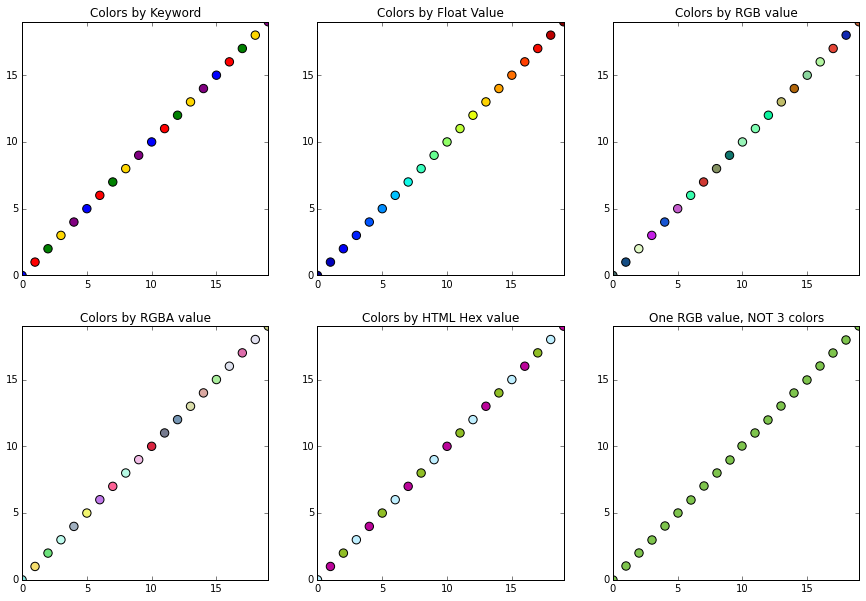

In [147]:
# data
N = 20
x = range(N)
y = x


# plotting
fig, ax = plt.subplots(2,3, figsize = (15,10))

ax[0,0].set(title = "Colors by Keyword", xlim = (min(x), max(x)), ylim = (min(y), max(y)))
colors_kwd = ['blue', 'red', 'green', 'gold', 'purple']
_tmp_0 = ax[0,0].scatter(x, y, c = colors_kwd, s = 70)

ax[0,1].set(title = "Colors by Float Value", xlim = (min(x), max(x)), ylim = (min(y), max(y)))
colors_float = sorted(np.linspace(0, N, N))
# NOTE This would not work:
# colors_float = np.random.rand(5)
# When colors are defined as arrays of floats, the length of the array needs to be equal to
# the length N of the data -- except when it's 3 != N or 4 != N, in which case it is interpreted
# as one RGB or RGBA value. See also next example.
_tmp_1 = ax[0,1].scatter(x, y, c = colors_float, s = 70)

ax[0,2].set(title = "Colors by RGB value", xlim = (min(x), max(x)), ylim = (min(y), max(y)))
colors_rgb_tuples = np.random.rand(N, 3)
_tmp_2 = ax[0,2].scatter(x, y, c = colors_rgb_tuples, s = 70)

ax[1,0].set(title = "Colors by RGBA value", xlim = (min(x), max(x)), ylim = (min(y), max(y)))
colors_rgba_tuples = np.random.rand(N, 4)
_tmp_3 = ax[1,0].scatter(x, y, c = colors_rgba_tuples, s = 70)

ax[1,1].set(title = "Colors by HTML Hex value", xlim = (min(x), max(x)), ylim = (min(y), max(y)))
colors_html_hex = ['#bfefff', '#bb049a', '#90be25']
_tmp_4 = ax[1,1].scatter(x, y, c = colors_html_hex, s = 70)

ax[1,2].set(title = "One RGB value, NOT 3 colors", xlim = (min(x), max(x)), ylim = (min(y), max(y)))
one_rgb = np.random.rand(3)
_tmp_5 = ax[1,2].scatter(x, y, c = one_rgb, s = 70)

### RGB, RGBA, or array of floats?

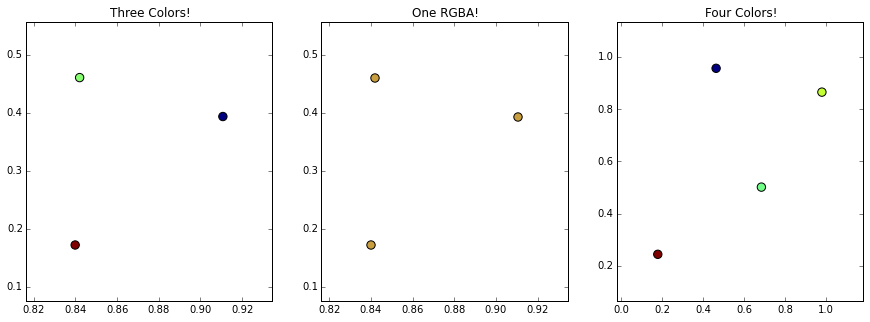

In [162]:
# data
x = np.random.rand(3)
y = np.random.rand(3)
dx = (max(x) - min(x)) / 3
dy = (max(y) - min(y)) / 3

# plotting
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

colors = np.random.rand(3)
ax[0].set(title = "Three Colors!", xlim = (min(x) - dx, max(x) + dx), ylim = (min(y) - dy, max(y) + dy))
_tmp = ax[0].scatter(x, y, c = colors, s = 70)

rgba = np.random.rand(4)
ax[1].set(title = "One RGBA!", xlim = (min(x) - dx, max(x) + dx), ylim = (min(y) - dy, max(y) + dy))
_tmp = ax[1].scatter(x, y, c = rgba, s = 70)


# new data
x = np.random.rand(4)
y = np.random.rand(4)
dx = (max(x) - min(x)) / 4
dy = (max(y) - min(y)) / 4


# last plot
four_colors = np.random.rand(4)
ax[2].set(title = "Four Colors!", xlim = (min(x) - dx, max(x) + dx), ylim = (min(y) - dy, max(y) + dy))
_tmp = ax[2].scatter(x, y, c = four_colors, s = 70)


## Plot

## Bar

## Histogram

## Pie